In [1]:
#Import libraries

# Numpy is a fundamental Scientific Computing with python
import numpy as np
# Famous Library to plot graphs in Python.
import matplotlib.pyplot as plt
# To interact with dataset stored in H5 file
import h5py
# Scipy and PIL for testing our own pictures at the end
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## Problem Statement

We have a dataset("data.h5") containing:

- a training set of m_train images labelled as cat (y=1) or non-cat (y=0)
- shape of each image = (num_px, num_px, 3)

Build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [2]:
# loadinng dataset
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

Y => [0], it's a non-cat's image


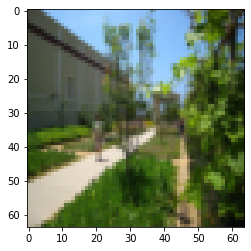

In [3]:
# Examples of a picture

index = 8
plt.imshow(train_set_x_orig[index])
print("Y => " + str(train_set_y[:, index]) + ", it's a "+classes[np.squeeze(train_set_y[:, index])].decode("utf-8")+"\'s image")


In [4]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print(m_train)
print(m_test)
print(num_px)

209
50
64


Reshape the matrix X to the shape (num_px* num_px * 3, 1)
<br>
<br>
X_flatten = X.reshape(X.shape[0], -1).T

In [5]:
train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
train_set_x.shape

(12288, 209)

In [6]:
'''
Maximum value of pixel is 255
Hence, standardization can be simply done by division with 255
'''

train_set_x = train_set_x/255
test_set_x = test_set_x/255

Steps:
- Initialize the parameters of the model
- Learn the parameters for thee model by minimizing the cost
- Use the learned parameters to make predictions (on the test set)
- Analyse the result and Conclude

In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [8]:
print(sigmoid(np.array([0, 2])))

[0.5        0.88079708]


In [9]:
def initialize(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    return w,b

In [10]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    #Forward Propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))/(-m)
    
    # BAckward Propagation
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    
    grads = {"dw":dw,
             "db":db}
    
    return grads, cost

In [11]:
def gradient_descent(w, b, X, Y, itr, alpha, print_cost=True):
    costs = []
    
    for i in range(itr):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha*dw
        b = b - alpha*db
        
        if i%100 == 0:
            costs.append(cost)
        if i%100 == 0 and print_cost:
            print("Cost after "+str(i)+" iteration ==> "+str(cost))
    params = {"w":w,
              "b":b}
    grads = {"dw":dw,
             "db":db}
    return params, grads, costs

In [12]:
def predict(w, b, X):
    m = X.shape[1]
    Y_pred = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        if(A[0][i] > 0.5):
            Y_pred[0][i] = 1
        else:
            Y_pred[0][i] = 0
            
    return Y_pred

In [13]:
def model(X_train, Y_train, X_test, Y_test, itr=2000, alpha=0.009, print_cost=False):
    
    w, b = initialize(X_train.shape[0])
    
    parameters, grads, costs = gradient_descent(w, b, X_train, Y_train, itr, alpha, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_pred_train = predict(w, b, X_train)
    Y_pred_test = predict(w, b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": itr}
    return d

In [14]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, itr = 2000, alpha = 0.01, print_cost = Falselearning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show())

train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


learning rate is: 0.007
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 97.60765550239235 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0009
train accuracy: 88.03827751196172 %
test accuracy: 64.0 %

-------------------------------------------------------



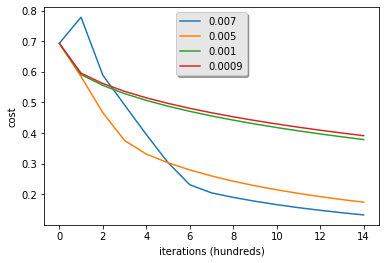

In [15]:
learning_rates = [0.007, 0.005, 0.001, 0.0009]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, itr = 1500, alpha = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()